In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_df = pd.read_csv("brewers_association_data_with_tax_data.csv")
data_df.head()

,Unnamed: 0,STATE,ZIP Code,NUMBER OF RETURNS,NUMBER OF RETURNS WITH TOTAL INCOME,TOTAL INCOME AMOUNT,NUMBER OF RETURNS WITH SALARIES AND WAGES,SALARIES AND WAGES AMOUNT,Brewery,Address,City,State
0,0,AL,35004.0,5210.0,5210.0,290260.0,4550.0,234833.0,NaN,NaN,NaN,NaN
1,1,AL,35005.0,3100.0,3100.0,121690.0,2660.0,98565.0,NaN,NaN,NaN,NaN
2,2,AL,35006.0,1200.0,1200.0,57418.0,1040.0,43707.0,NaN,NaN,NaN,NaN
3,3,AL,35007.0,11940.0,11940.0,697882.0,10180.0,545418.0,siluria brewing company,145 1st ave w,Alabaster,AL
4,4,AL,35010.0,7910.0,7910.0,384319.0,6700.0,266658.0,NaN,NaN,NaN,NaN


In [99]:
brew_by_zipcode = data_df.groupby(["ZIP Code"], as_index=False).count()
num_zip_0_brews = brew_by_zipcode["Brewery"].value_counts()
print(num_zip_0_brews)

0     25458
1      2982
2       875
3       319
4       122
5        59
6        44
7        25
8        12
9         9
10        5
11        4
12        3
15        2
13        1
16        1
Name: Brewery, dtype: int64


In [17]:
#brew_by_state = data_df.groupby("STATE")["Brewery"].count()
brew_by_state = data_df.groupby(["STATE"], as_index=False).count()
brew_by_state.head()

,STATE,Unnamed: 0,ZIP Code,NUMBER OF RETURNS,NUMBER OF RETURNS WITH TOTAL INCOME,TOTAL INCOME AMOUNT,NUMBER OF RETURNS WITH SALARIES AND WAGES,SALARIES AND WAGES AMOUNT,Brewery,Address,City,State
0,AK,168,168,168,168,168,168,168,41,41,41,41
1,AL,609,609,609,609,609,609,609,42,41,42,42
2,AR,523,523,523,523,523,523,523,38,38,38,38
3,AZ,426,426,426,426,426,426,426,117,117,117,117
4,CA,2016,2016,2016,2016,2016,2016,2016,841,841,841,841


In [92]:
percents_of_total_num_breweries = []
for x in range(len(num_zip_0_brews)):
    percents_of_total_num_breweries.append(len(brew_by_zipcode.loc[brew_by_zipcode["Brewery"] == x, :]) / len(data_df))
print(percents_of_total_num_breweries)

[0.7774622079706826, 0.09106733852496564, 0.026721636891128418, 0.009741945335165675, 0.0037257596579630477, 0.0018018018018018018, 0.001343716597953886, 0.0007634753397465262, 0.0003664681630783326, 0.00027485112230874945, 0.00015269506794930523, 0.0001221560543594442, 9.161704076958314e-05, 3.053901358986105e-05, 0.0, 6.10780271797221e-05]


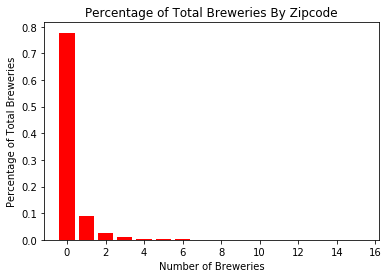

In [98]:
plt.bar(range(len(num_zip_0_brews)), percents_of_total_num_breweries, color="r", align="center")
plt.title("Percentage of Total Breweries By Zipcode")
plt.xlabel("Number of Breweries")
plt.ylabel("Percentage of Total Breweries")
plt.savefig("percentage_of_total_breweries_by_zipcode")
plt.show()

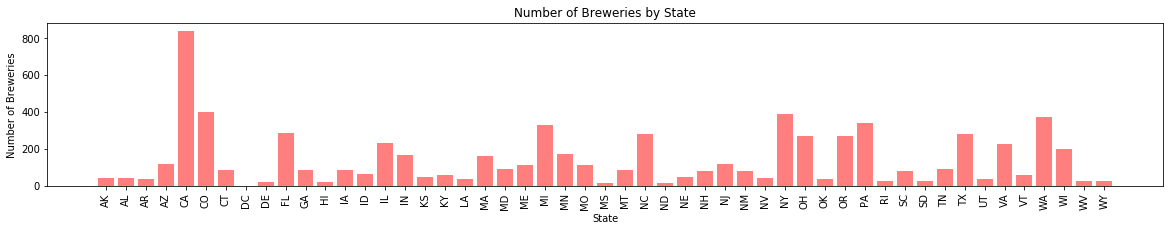

In [26]:
# Count of Breweries by State
x_axis = np.arange(len(brew_by_state))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, brew_by_state["Brewery"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, brew_by_state["STATE"], rotation="vertical")
plt.title("Number of Breweries by State")
plt.xlabel("State")
plt.ylabel("Number of Breweries")
plt.savefig("total_breweries_by_state.png")
plt.show()

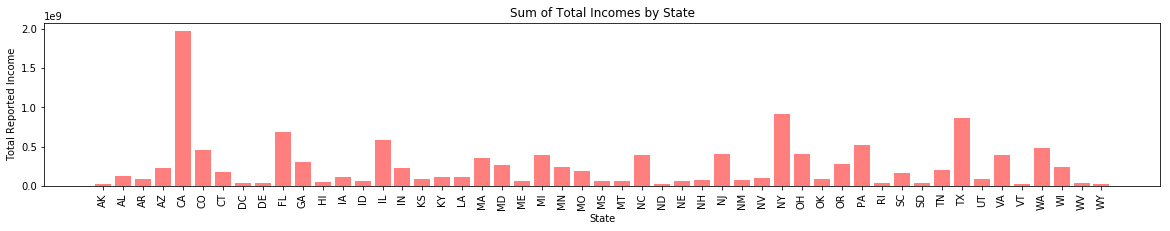

In [25]:
# Sum Total Income by State
x_axis = np.arange(len(total_income_by_state))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, total_income_by_state["TOTAL INCOME AMOUNT"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, total_income_by_state["STATE"], rotation="vertical")
plt.title("Sum of Total Incomes by State")
plt.xlabel("State")
plt.ylabel("Total Reported Income")
plt.savefig("total_income_by_state.png")
plt.show()

In [11]:
total_income_by_state = data_df.groupby(["STATE"], as_index=False).sum()
total_income_by_state.head()

,STATE,Unnamed: 0,ZIP Code,NUMBER OF RETURNS,NUMBER OF RETURNS WITH TOTAL INCOME,TOTAL INCOME AMOUNT,NUMBER OF RETURNS WITH SALARIES AND WAGES,SALARIES AND WAGES AMOUNT
0,AK,116340,16744759.0,434960.0,434950.0,3.090503e+07,369360.0,2.138658e+07
1,AL,185136,21894873.0,2113210.0,2113200.0,1.220650e+08,1777420.0,8.564631e+07
2,AR,765672,37820376.0,1388780.0,1388780.0,8.526489e+07,1177020.0,5.526871e+07
3,AZ,421527,36472441.0,3565670.0,3565660.0,2.264415e+08,2952120.0,1.541293e+08
4,CA,5510736,188576049.0,24177650.0,24177650.0,1.972366e+09,20130700.0,1.345928e+09


In [13]:
avg_income_by_state = data_df.groupby(["STATE"], as_index=False).mean()
avg_income_by_state.head()

,STATE,Unnamed: 0,ZIP Code,NUMBER OF RETURNS,NUMBER OF RETURNS WITH TOTAL INCOME,TOTAL INCOME AMOUNT,NUMBER OF RETURNS WITH SALARIES AND WAGES,SALARIES AND WAGES AMOUNT
0,AK,692.5,99671.184524,2589.047619,2588.988095,183958.494048,2198.571429,127301.089286
1,AL,304.0,35952.172414,3469.967159,3469.950739,200435.201970,2918.587849,140634.338259
2,AR,1464.0,72314.294455,2655.411090,2655.411090,163030.388145,2250.516252,105676.304015
3,AZ,989.5,85616.058685,8370.117371,8370.093897,531552.845070,6929.859155,361805.767606
4,CA,2733.5,93539.706845,11992.881944,11992.881944,978355.903274,9985.466270,667623.095238


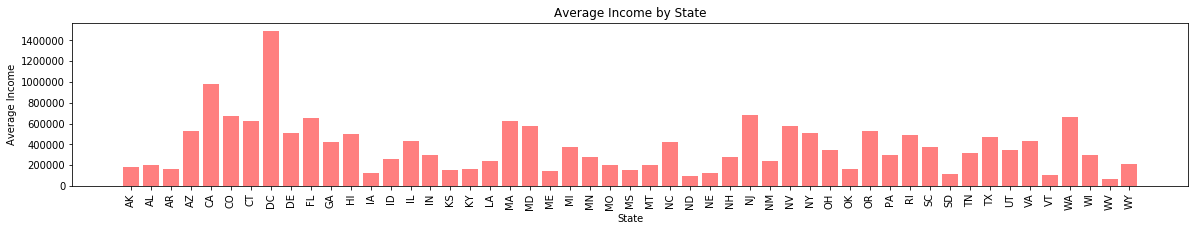

In [24]:
# Avg Total Income by State
x_axis = np.arange(len(avg_income_by_state))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, avg_income_by_state["TOTAL INCOME AMOUNT"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, avg_income_by_state["STATE"], rotation="vertical")
plt.title("Average Income by State")
plt.xlabel("State")
plt.ylabel("Average Income")
plt.savefig("avg_income_by_state.png")
plt.show()

In [105]:
#list_un_states = data_df["STATE"].unique().tolist()
#new_list = list_un_states.sort(reverse=False)
breweries_by_state = brew_by_state.loc[:,"Brewery"]
count_brews_by_state = breweries_by_state.tolist()
states_by_breweries = brew_by_state.loc[:,"STATE"]
state_by_count_brews = states_by_breweries.tolist()

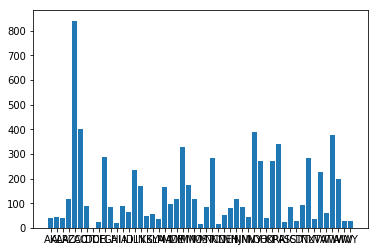

In [110]:
plt.bar(state_by_count_brews, count_brews_by_state)
plt.show()

In [16]:
brew_by_state.describe()

count     51.000000
mean     141.627451
std      150.690406
min        0.000000
25%       40.000000
50%       86.000000
75%      212.500000
max      841.000000
Name: Brewery, dtype: float64

In [22]:
brew_by_zip = data_df.groupby("ZIP Code")["Brewery"].count()
brew_by_zip.describe()

count    29921.000000
mean         0.243207
std          0.767121
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         16.000000
Name: Brewery, dtype: float64

In [36]:
data_df.loc[data_df["State"] == "NV"]

,Unnamed: 0,STATE,ZIP Code,NUMBER OF RETURNS,NUMBER OF RETURNS WITH TOTAL INCOME,TOTAL INCOME AMOUNT,NUMBER OF RETURNS WITH SALARIES AND WAGES,SALARIES AND WAGES AMOUNT,Brewery,Address,City,State
17287,17287,NV,89005.0,7060.0,7060.0,572201.0,5040.0,285586.0,boulder dam brewing company,453 nevada way,Boulder City,NV
17291,17291,NV,89011.0,12850.0,12850.0,1019021.0,11010.0,616613.0,astronomy aleworks,7350 eastgate rd ste 170,Henderson,NV
17292,17292,NV,89011.0,12850.0,12850.0,1019021.0,11010.0,616613.0,bad beat brewing,7380 eastgate rd ste 110,Henderson,NV
17293,17293,NV,89011.0,12850.0,12850.0,1019021.0,11010.0,616613.0,crafthaus brewery,7350 eastgate rd ste 110,Henderson,NV
17296,17296,NV,89014.0,19270.0,19270.0,1098072.0,16600.0,773486.0,barley's casino and brewing co,4500 e sunset rd ste 30,Henderson,NV
17297,17297,NV,89014.0,19270.0,19270.0,1098072.0,16600.0,773486.0,"joseph james brewing co, inc",155 n gibson rd,Henderson,NV
17298,17298,NV,89015.0,17670.0,17670.0,915437.0,14830.0,667340.0,lovelady brewing company,20 s water st,Henderson,NV
17305,17305,NV,89029.0,3470.0,3470.0,180451.0,2320.0,75503.0,pints brewery and sports bar,2100 s casino dr,Laughlin,NV
17316,17316,NV,89049.0,1140.0,1140.0,66796.0,980.0,49992.0,tonopah brewing co,315 s main st,Tonopah,NV
17325,17325,NV,89101.0,15070.0,15070.0,522011.0,13580.0,381983.0,banger brewing co,450 fremont st ste 135,Las Vegas,NV


In [80]:
number_of_returns_zip_series = data_df.groupby("ZIP Code")["NUMBER OF RETURNS"].sum()
number_of_returns_zip_series.head()

ZIP Code
1001.0     8980.0
1002.0    18980.0
1003.0      170.0
1005.0     2370.0
1007.0     7580.0
Name: NUMBER OF RETURNS, dtype: float64

In [34]:
data_df.loc[data_df["State"] == "NV"].nunique()

Unnamed: 0                                   44
STATE                                         1
ZIP Code                                     27
NUMBER OF RETURNS                            27
NUMBER OF RETURNS WITH TOTAL INCOME          27
TOTAL INCOME AMOUNT                          27
NUMBER OF RETURNS WITH SALARIES AND WAGES    27
SALARIES AND WAGES AMOUNT                    27
Brewery                                      44
Address                                      44
City                                         12
State                                         1
dtype: int64

In [35]:
data_df.loc[data_df["State"] == "NV"].mean()

Unnamed: 0                                    17377.568182
ZIP Code                                      89324.136364
NUMBER OF RETURNS                             11514.545455
NUMBER OF RETURNS WITH TOTAL INCOME           11514.545455
TOTAL INCOME AMOUNT                          716808.818182
NUMBER OF RETURNS WITH SALARIES AND WAGES      9867.272727
SALARIES AND WAGES AMOUNT                    443891.000000
dtype: float64

In [66]:
brew_by_state_list = brew_by_state.tolist()
brew_by_state_list

[41,
 42,
 38,
 117,
 841,
 401,
 89,
 0,
 24,
 288,
 86,
 20,
 89,
 63,
 233,
 168,
 47,
 58,
 37,
 164,
 95,
 116,
 330,
 174,
 115,
 16,
 85,
 282,
 15,
 50,
 79,
 117,
 83,
 44,
 388,
 273,
 39,
 271,
 340,
 25,
 83,
 28,
 91,
 284,
 37,
 225,
 62,
 375,
 200,
 26,
 29]

In [77]:
list_states_match_num_brew = data_df.STATE.unique().tolist()
list_states_match_num_brew.sort(reverse=False)

TypeError: '<' not supported between instances of 'float' and 'str'

TypeError: <lambda>() missing 1 required positional argument: 'height'

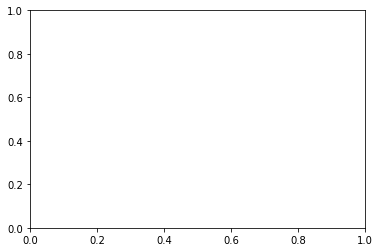

In [11]:
plt.bar(brew_by_state_list, align=center)
plt.show()